In [1]:
import random
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
import itertools
pd.options.mode.chained_assignment = None  # default='warn'

## Get the weekly scores for everybody skipping the first bye week
tom = [419, 398, 469.5, 463.5, 468.5, 490.5, 495, 493, 526, 477, 439.5, 493.5, 426, 521, 547.5, 471]
freewoe = [389.5, 428, 499, 550.5, 454, 490, 523.5, 467,516, 453.5, 494, 455.5, 546.5, 504.5, 426.5, 511.5]
ola = [316.5, 364.5,450, 451.5, 434.5, 436.5, 397.5, 387, 456, 423, 423, 464, 388, 401, 366, 454.5]
ham = [310, 450.5, 404, 338.5, 482, 419, 477, 471, 470, 328.5, 460.5, 472, 477.5, 422, 406, 461.5]
jaja = [447.5, 442.5, 356, 357.5, 435, 423, 423.5, 418.5, 523, 418.5, 449, 546, 426, 436, 452.5, 428]
cannon = [455.5, 439.5, 446.5, 539.5, 477, 421, 412.5, 481, 396.5, 381.5, 440.5, 435, 528, 450.5, 503.5, 418.5]
sha = [402.5, 462.5, 452.5, 399, 324, 410.5, 542.5, 461, 478.5, 517, 495.5, 405, 378.5, 445.5, 444, 451.5]
burrito = [466, 453.5, 424.5, 396, 473.5, 472, 377, 394.5, 425, 484.5, 388.5, 482, 456.5, 534.5, 411, 492]
bar = [266,341, 344.5, 288, 373, 396, 270, 279.5, 367.5,346,400, 382.5, 369, 327, 343, 310.5,]
cor = [361, 305.5, 242.5, 358.5, 346, 353, 352.5, 324, 328.5, 358.5, 292, 251, 283, 237, 344.5, 320]

## populating dictionary with names to scores 
players = {"freewoe" : freewoe, "tom" : tom, "cannon": cannon,
"sha" : sha, "ham": ham, "burrito" :burrito, "jaja" : jaja,
"ola" : ola, "cor" : cor, "bar": bar}

cols = ["Week_%s" % str(x) for x in range(1,17)]
## initializing dataframe
df = pd.DataFrame(data=list(players.values()), columns = cols, index=[i for i in players.keys()])

## Getting the standard deviations and means of the scores for each player 
vols = {}
means = {}
for player, stats in players.items():
    v = np.std(stats)
    vols[player] = v
    tot = np.sum(stats)
    means[player] = tot/16 ## dividing by number of active matchups--first week was BYE
    
## sorted reverse 
vols_sorted = dict(sorted(vols.items(), key = lambda vols: vols[1], reverse=True))
means_sorted = dict(sorted(means.items(), key = lambda means: means[1], reverse= True))

## calculating the 1-standard deviation ranges for everybody
range_sorted = vols_sorted.copy()

for name, mean in means_sorted.items():
    r = mean - range_sorted[name], mean + range_sorted[name] 
    range_sorted[name] = r
    
range_sorted

{'ham': (372.77822389696036, 483.47177610303964),
 'sha': (389.05203506049668, 494.69796493950332),
 'jaja': (390.3443966293691, 482.4681033706309),
 'freewoe': (438.05458226484546, 525.63291773515459),
 'burrito': (402.33470489114916, 489.04029510885084),
 'cannon': (408.45261923894589, 494.85988076105411),
 'bar': (295.1519022962118, 380.2855977037882),
 'cor': (274.31261686628159, 357.87488313371841),
 'ola': (373.19180470543802, 453.49569529456198),
 'tom': (435.99078924289859, 513.82171075710141)}

After compiling everybody's scores, we calculate their 1-std range as their scoring capabilities 

In [2]:
df.head()

,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Week_16
freewoe,389.5,428.0,499.0,550.5,454.0,490.0,523.5,467.0,516.0,453.5,494.0,455.5,546.5,504.5,426.5,511.5
tom,419.0,398.0,469.5,463.5,468.5,490.5,495.0,493.0,526.0,477.0,439.5,493.5,426.0,521.0,547.5,471.0
cannon,455.5,439.5,446.5,539.5,477.0,421.0,412.5,481.0,396.5,381.5,440.5,435.0,528.0,450.5,503.5,418.5
sha,402.5,462.5,452.5,399.0,324.0,410.5,542.5,461.0,478.5,517.0,495.5,405.0,378.5,445.5,444.0,451.5
ham,310.0,450.5,404.0,338.5,482.0,419.0,477.0,471.0,470.0,328.5,460.5,472.0,477.5,422.0,406.0,461.5


In [3]:
## populating the dataframe with the player name, average score, and average volatility 
names = df.index.tolist()
df["Player"] = names
df["Average"] = 0
df["Volatility"] = 0

for index in df.index:
    df.loc[index,"Average"] = means_sorted[index]
    df.loc[index, "Volatility"] = vols_sorted[index]

cols = df.columns.tolist()
cols = cols[-3:] + cols[:-3]
df = df[cols]
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df

,Player,Average,Volatility,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Week_16
0,freewoe,481.84375,43.789168,389.5,428.0,499.0,550.5,454.0,490.0,523.5,467.0,516.0,453.5,494.0,455.5,546.5,504.5,426.5,511.5
1,tom,474.90625,38.915461,419.0,398.0,469.5,463.5,468.5,490.5,495.0,493.0,526.0,477.0,439.5,493.5,426.0,521.0,547.5,471.0
2,cannon,451.65625,43.203631,455.5,439.5,446.5,539.5,477.0,421.0,412.5,481.0,396.5,381.5,440.5,435.0,528.0,450.5,503.5,418.5
3,sha,441.87500,52.822965,402.5,462.5,452.5,399.0,324.0,410.5,542.5,461.0,478.5,517.0,495.5,405.0,378.5,445.5,444.0,451.5
4,ham,428.12500,55.346776,310.0,450.5,404.0,338.5,482.0,419.0,477.0,471.0,470.0,328.5,460.5,472.0,477.5,422.0,406.0,461.5
5,burrito,445.68750,43.352795,466.0,453.5,424.5,396.0,473.5,472.0,377.0,394.5,425.0,484.5,388.5,482.0,456.5,534.5,411.0,492.0
6,jaja,436.40625,46.061853,447.5,442.5,356.0,357.5,435.0,423.0,423.5,418.5,523.0,418.5,449.0,546.0,426.0,436.0,452.5,428.0
7,ola,413.34375,40.151945,316.5,364.5,450.0,451.5,434.5,436.5,397.5,387.0,456.0,423.0,423.0,464.0,388.0,401.0,366.0,454.5
8,cor,316.09375,41.781133,361.0,305.5,242.5,358.5,346.0,353.0,352.5,324.0,328.5,358.5,292.0,251.0,283.0,237.0,344.5,320.0
9,bar,337.71875,42.566848,266.0,341.0,344.5,288.0,373.0,396.0,270.0,279.5,367.5,346.0,400.0,382.5,369.0,327.0,343.0,310.5


Let's plot out each player's average mean and volatility

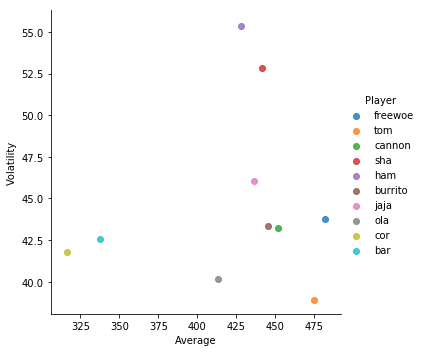

In [94]:
# sns.regplot(x = df["Average"], y = df["Volatility"], fit_reg=True)
x = sns.lmplot(fit_reg=False,x = "Average", y = "Volatility", hue = "Player", data = df)
plt.show()

Ham and Sha are the two players with the greatest average volatility and both are contenders for playoff spots so those expecting a steady result with these two will be in for a rude awakening. 

The top two players, Freewoe and Tom, sport the highest scoring averages with Tom (me) also doing this consistently week-over-week. Now this doesn't necessarily mean Freewoe wasn't consistent, but rather he possibly could have had higher peaks in certain weeks while still experiencing highly performing scores. 

Let's take the point of views of a player shall we? 

If I were ola, I would appear to be consistently low scoring but also with low volatility indicating a consistent below-average performance. However, ola is still good enough to reasonably capture jaja,burrito,cannon and more likely with ham or sha due to their extreme volatilities. This proves ola's team to be bordering on elite despite what his record of 5-11 may indicate. 

Now, the front-runner of the whole tournament, Freewoe, boasts an impressive starting lineup of Davis, PG3, dark horse MVP (Vucci Mane), CP3, and D'lo. However, despite his record, his rivals aren't far behind. A good showing from any of the playoff hopefuls can steal his thunder with their volatilities. And now that rumors are afloat that Davis will be significantly shut down for the season, the gates are wide open. Luckily for freewoe and tom, they survive with the bye seeds for expected 1-2 seeds. Some winnings is better than none...


### Win Probabilities

In [5]:
p_probs = {}

for player in range_sorted.keys():
    non_players = range_sorted.copy()
    del non_players[player]
    opps_dict = {}
    for p in non_players.keys():
        result = 0 
        for i in range(10000):
            play_rand = np.random.randint(range_sorted[player][0], range_sorted[player][1])
            opp_rand = np.random.randint(range_sorted[p][0], range_sorted[p][1])
            diff = play_rand - opp_rand 
            if diff > 0:
                result += 1
        perc = round(result/10000*100,2)
#         print("{} has a {}% chance of winning against {}".format(player, perc, p))
        opps_dict[p] = perc
    p_probs[player] = opps_dict
    
p_probs

{'ham': {'sha': 37.0,
  'jaja': 41.71,
  'freewoe': 10.44,
  'burrito': 33.72,
  'cannon': 28.54,
  'bar': 99.58,
  'cor': 100.0,
  'ola': 62.1,
  'tom': 12.74},
 'sha': {'ham': 62.57,
  'jaja': 54.73,
  'freewoe': 17.05,
  'burrito': 45.9,
  'cannon': 40.02,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 74.86,
  'tom': 20.53},
 'jaja': {'ham': 57.15,
  'sha': 43.83,
  'freewoe': 11.38,
  'burrito': 40.88,
  'cannon': 34.28,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 72.34,
  'tom': 15.33},
 'freewoe': {'ham': 89.61,
  'sha': 82.86,
  'jaja': 87.87,
  'burrito': 83.11,
  'cannon': 78.69,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 98.09,
  'tom': 58.89},
 'burrito': {'ham': 65.76,
  'sha': 52.68,
  'jaja': 58.89,
  'freewoe': 16.33,
  'cannon': 43.19,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 80.28,
  'tom': 20.32},
 'cannon': {'ham': 70.32,
  'sha': 59.08,
  'jaja': 65.63,
  'freewoe': 20.15,
  'burrito': 56.17,
  'bar': 100.0,
  'cor': 100.0,
  'ola': 84.61,
  'tom': 26.35},
 'bar': {'ham': 0.1

### Expected Wins for each Player

In [6]:
win = 1
num_match = 2
exp_dic = {x : 0 for x in p_probs.keys()} ## initialize dictionary

for player, opps in p_probs.items():
    exp = 0 
    for opp, prob in opps.items():
        exp += prob/100 *win * num_match
    exp_dic[player] = exp
        
exp_wins = sorted(exp_dic.items(), key = lambda exp_dic : exp_dic[1], reverse = True)

exp_wins

[('freewoe', 15.5824),
 ('tom', 14.7822),
 ('cannon', 11.646199999999999),
 ('burrito', 10.749),
 ('sha', 10.3132),
 ('jaja', 9.5038),
 ('ham', 8.5166),
 ('ola', 6.5044),
 ('bar', 1.4478),
 ('cor', 0.5274)]

In [7]:
## analysis done in midst of penultimate regular season matchup so let's compare what the 
## expected state of the Wins would be 

current_exp_state = []
for x in exp_wins:
    x = list(x)
    if x[1] > 2: ## preventing negative values for players: bar and cor
        x[1] = x[1] - 2
    current_exp_state.append([x[0], x[1]])
    
current_exp_state

[['freewoe', 13.5824],
 ['tom', 12.7822],
 ['cannon', 9.646199999999999],
 ['burrito', 8.749],
 ['sha', 8.3132],
 ['jaja', 7.5038],
 ['ham', 6.5166],
 ['ola', 4.5044],
 ['bar', 1.4478],
 ['cor', 0.5274]]

In [8]:
current_reality = [["freewoe", 13], ["tom", 12], ["cannon", 10], ["sha", 10], ["ham", 10], 
                   ["burrito", 9], ["jaja", 9], ["ola", 5], ["cor", 2], ["bar", 0]]
current_reality

[['freewoe', 13],
 ['tom', 12],
 ['cannon', 10],
 ['sha', 10],
 ['ham', 10],
 ['burrito', 9],
 ['jaja', 9],
 ['ola', 5],
 ['cor', 2],
 ['bar', 0]]

This looks as if the expected wins are close to the scoring ranges from the past 16 weeks. 
Tom and Freewoe both are essentially what the expected wins would predict while it appears 
Player Ham was the beneficiary of good luck with favorable matchups as he was only expected to win 6.4 games but won 10 games 

### Getting into the Playoffs

##### Only Top 6 Teams can Enter Playoffs 

Currently in the standings, the top 2 seeds have virtually guaranteed being in the playoffs. However, the next top 5 players are all either tied or separated from each other by one game. Therefore, since will be gunning for the last 4 spots, one person will have the misfortune of completely missing the playoffs

In [9]:
Ham = {"ham": ["jaja", "cannon"]}
Cannon = {"cannon": ["tom", "ham"]}
Jaja = {"jaja" : ["ham","freewoe"]}
Burr = {"burrito" : ["sha", "cor"]}
Sha = {"sha" : ["burrito", "ola"]}

rem = [Ham, Cannon, Jaja, Burr, Sha]

rem_probs = {}
for match in rem:
    for player, opps in match.items():
        opp_probs = []
        for i in opps:
            opp_probs.append(p_probs[player][i])
        rem_probs[player] = opp_probs

rem_probs

{'ham': [41.71, 28.54],
 'cannon': [26.35, 70.32],
 'jaja': [57.15, 11.38],
 'burrito': [52.68, 100.0],
 'sha': [45.9, 74.86]}

In [10]:
exp_rem_wins = {}

for player, probs in rem_probs.items():
    exp = 0
    for p in probs:
        exp += (p * 1 /100)
    exp_rem_wins[player] = exp
    
exp_rem_wins = sorted(exp_rem_wins.items(), key = lambda exp_rem_wins: exp_rem_wins[1], reverse=True)
exp_rem_reality = []
for x in exp_rem_wins:
    if x[0]== "burrito" or x[0] == "jaja":
        num = x[1] +9
        exp_rem_reality.append([x[0], num])
    else:
        num = x[1] + 10
        exp_rem_reality.append([x[0],num])
                               
sorted(exp_rem_reality, key = lambda exp_rem_reality : exp_rem_reality[1], reverse=True)

[['sha', 11.2076],
 ['cannon', 10.9667],
 ['ham', 10.7025],
 ['burrito', 10.5268],
 ['jaja', 9.6853]]

##### A state of the Playoff Contenders 

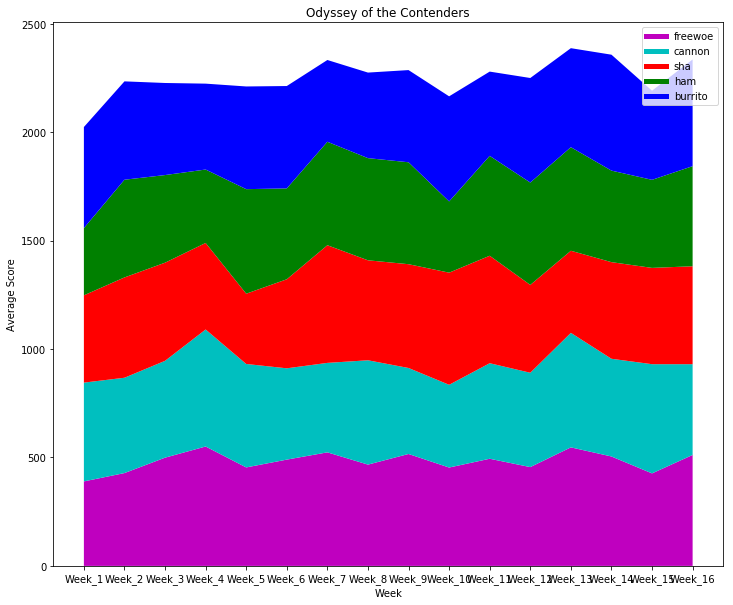

In [84]:
names = ["freewoe", "ham", "burrito", "jaja", "cannon", "sha"]

five_p = df[df["Player"].isin(names)]
five_p = five_p.drop(columns = ["Average", "Volatility"])

names = []
for p in five_p.index:
    name = five_p.loc[p][0]
    names.append(name)

five_p = five_p.drop(columns = ["Player"])
five_p.reset_index()


fig, ax = plt.subplots(figsize = (12,10))

plt.plot([],[],color='m', label=names[0], linewidth=5)
plt.plot([],[],color='c', label=names[1], linewidth=5)
plt.plot([],[], color="r", label = names[2], linewidth=5)
plt.plot([],[],color='g', label=names[3], linewidth=5)
plt.plot([],[],color='b', label=names[4], linewidth=5)

weeks = ["Week_%s" % str(x) for x in range(1,17)]
plt.stackplot(weeks, five_p.iloc[0], five_p.iloc[1], five_p.iloc[2], five_p.iloc[3], five_p.iloc[4],
              colors=['m','c', "r", "g", "b"])
plt.xlabel("Week")
plt.ylabel("Average Score")
plt.title("Odyssey of the Contenders")
plt.legend()
plt.show()

The top 5 contenders compared to the 1st seed -- Freewoe 

In [12]:
## calculate playoff chances 

## total prob space = 5 possible loser-scenario spaces 
##and for a certain player they will need to be in 4 out of those 5 scenarios
rem_probs

{'ham': [41.71, 28.54],
 'cannon': [26.35, 70.32],
 'jaja': [57.15, 11.38],
 'burrito': [52.68, 100.0],
 'sha': [45.9, 74.86]}

In [13]:
print(rem, "\n\n")
print(rem_probs)

[{'ham': ['jaja', 'cannon']}, {'cannon': ['tom', 'ham']}, {'jaja': ['ham', 'freewoe']}, {'burrito': ['sha', 'cor']}, {'sha': ['burrito', 'ola']}] 


{'ham': [41.71, 28.54], 'cannon': [26.35, 70.32], 'jaja': [57.15, 11.38], 'burrito': [52.68, 100.0], 'sha': [45.9, 74.86]}


2, 1, or 0 wins are the only outcomes 
1. Ham wins 2 games -- Cannon and Jaja are now down to 1 
2. Cannon wins 2 games -- Ham down to 1
3. Jaja wins 2 games -- Ham down to 1 
4. Burrito wins 2 games -- Sha down to 1 
5. Sha wins two games -- Burrito down to 1 

P(Ham wins 2 games) = .42 * .28 -> Cannon can get 10 or 11, Jaja can get 9 or 10
P(Ham wins 1 game) = .42 * .72 + .58* .28 -> Cannon can get 11 or 12, Jaja can get 10,11
P(Ham wins 0 games) = .58 * .72  -> Cannon can get 11 or 12, Jaja can get 10 or 11


So what are all possible game states?

if ham wins 2 games and burrito wins 2 games then jaja/cannon/sha can only win max 1 game

 H-A-J-C-S
- 2,2,1,1,1  # see above
- 2,1,1,1,2
- 2,0,1,1,2
- 1,2,2,2,1
- 1,1,2,2,2

1,0 ... 
and so on and so forth 


Total Scenario Probabilities 

a. 2,2,_ _ _ (x8) -> H and B win max so 0,1 for all others 

b. 2,1,_ _ _ (x12)-> H wins max, B splits so 0,1 for J/C, 0,1,2 for S

c. 2,0,_ _ _ (x8)  -> H wins max, B wins none so 0,1 for J/C, and 1,2 for S

d. 1,1, _ _ _ (x27) -> H/B split so 0,1,2 for all others 

e. 0,2, _ _ _ (x8) -> H wins none, B win max so 1,2 for J/C and 0,1 for S

f. 0,1, _ _ _ (x12) -> H wins none, B split so 1,2 for J/C and 0,1,2 for S 

g. 0,0, _ _ _ (x8) -> H/B win none, so 1,2 for J/C and 1,2 for S 

h. 1,0, _ _ _ (x12) -> H splits, B wins none, so 0,1,2 for J/C and 1,2 for S

i. 1,2, _ _ _ (x12) -> H splits, B wins max, so 0,1,2 for J/C and 0,1 for S

so a grand total of 83 possible states of expected wins. 
Let's see if the code also arrives at the same total number of all possible scenarios

In [14]:
from itertools import product

## a. 2,2,_ _ _ (x8) -> H and B win max so 0,1 for all others

Ha = {2:12}
Ba = {2 :11}
Ja = {0 :9, 1 :10}
Ca = {0 : 10, 1: 11}
Sa = {0 : 10, 1 :11}

## b. 2,1,_ _ _ (x12)-> H wins max, B splits so 0,1 for J/C, 0,1,2 for S

Hb = {2:12}
Bb = {1 : 10}
Jb = {0 :9, 1 :10}
Cb = {0 : 10, 1: 11}
Sb = {0 : 10, 1 :11, 2 : 12}

## c. 2,0,_ _ _ (x8)  -> H wins max, B wins none so 0,1 for J/C, and 1,2 for S

Hc = {2:12}
Bc = {0:9}
Jc = {0 :9, 1 :10}
Cc = {0 : 10, 1: 11}
Sc = {1 :11, 2 : 12}

## d. 1,1, _ _ _ (x27) -> H/B split so 0,1,2 for all others 

Hd = {1:11}
Bd = {1:10}
Jd = {0 : 9, 1 :10, 2 : 11}
Cd = {0 : 10, 1 :11, 2 : 12}
Sd = {0 : 10, 1 :11, 2 : 12}

## e. 0,2, _ _ _ (x8) -> H wins none, B win max so 1,2 for J/C and 0,1 for S

He = {0:10}
Be = {2:11}
Je = {1 :10, 2 : 11}
Ce = {1 :11, 2 : 12}
Se = {0 : 10, 1 :11}

## f. 0,1, _ _ _ (x12) -> H wins none, B split so 1,2 for J/C and 0,1,2 for S 

Hf = {0:10}
Bf = {1:10}
Jf = {1 :10, 2 : 11}
Cf = {1 :11, 2 : 12}
Sf = {0 : 10, 1 :11, 2 : 12}

## g. 0,0, _ _ _ (x8) -> H/B win none, so 1,2 for J/C and 1,2 for S 

Hg = {0:10}
Bg = {0:9}
Jg = {1 :10, 2 : 11}
Cg = {1 :11, 2 : 12}
Sg = {1 :11, 2 : 12}

## h. 1,0, _ _ _ (x12) -> H splits, B wins none, so 0,1,2 for J/C and 1,2 for S

Hh = {1:11}
Bh = {0:9}
Jh = {0 : 10, 1 :11, 2 : 12}
Ch = {0 : 10, 1 :11, 2 : 12}
Sh = {1 :11, 2 : 12}

## i. 1,2, _ _ _ () -> H splits, B wins max, so 0,1,2 for J/C and 0,1 for S

Hi = {1:11}
Bi = {2:11}
Ji = {0 : 10, 1 :11, 2 : 12}
Ci = {0 : 10, 1 :11, 2 : 12}
Si = {0 : 10, 1 :11, 2 : 12}

def productDF(H, B, J, C, S):
    ptotal = product(H.items(), B.items(), J.items(), C.items(), S.items())
    ptot_list = []
    for H,A,J,C,S in ptotal:
        ptot_list.append([H,A,J,C,S])
    pdf = pd.DataFrame(data = ptot_list, columns = ["ham", "burrito", "jaja", "cannon", "sha"], 
                   index = [i for i in range(len(ptot_list))])
    return pdf

lets = "a b c d e f g h i".split()
df_5 = pd.DataFrame(columns = ["ham", "burrito", "jaja", "cannon", "sha"])
for i in range(9):
    pdf = productDF(eval("H" + lets[i]), eval("B" + lets[i],),
                    eval("J" + lets[i]), eval("C" + lets[i]), eval("S"+lets[i]))
    df_5 = df_5.append(pdf)
    
tot_state = df_5.reset_index()
print(len(tot_state.index))
tot_state.head()

128


,index,ham,burrito,jaja,cannon,sha
0,0,"(2, 12)","(2, 11)","(0, 9)","(0, 10)","(0, 10)"
1,1,"(2, 12)","(2, 11)","(0, 9)","(0, 10)","(1, 11)"
2,2,"(2, 12)","(2, 11)","(0, 9)","(1, 11)","(0, 10)"
3,3,"(2, 12)","(2, 11)","(0, 9)","(1, 11)","(1, 11)"
4,4,"(2, 12)","(2, 11)","(1, 10)","(0, 10)","(0, 10)"


We arrive at 128 total scenarios.

The next step is to figure out the probability of each row to occur. 
Or, in other words, to calculate the likelihood of each player reaching a specific number of wins 

In [15]:
## function below calculates the probability that a player has 2 wins, 1 win, or 0 wins for his series of opponents 
def probWins(name, num_wins, rem_probs):
    opp_probs = rem_probs[name]
    win_base = 1
    lose_base = 1
    if num_wins == 2:
        for p in opp_probs:
            win_base *= (p/100)
        return win_base
    elif num_wins == 1:   # Independent Events - > P(a or b) = P(a) + P(b) - P(A+B)              
        for p in opp_probs:
            win_base *= (p/100)
        pa = opp_probs[0]/100
        pb = opp_probs[1]/100
        pab = win_base 
        xor_win = pa + pb - pab
        return xor_win
    else: 
        for p in opp_probs:
            lose_base *= (100-p)/100
        return lose_base

## function calculating the joint probability of the 5 players 
def rowProb(hp, jp, bp, sp, cp):
    return hp * jp * bp * sp * cp 
    
## returns the df with the row probability calculated 
def calcRow(inst_index, df):
    inst = df.iloc[inst_index]
    for name, exp in zip(inst.index, inst):
        if name == "ham":
            hp = probWins("ham", exp[0], rem_probs)
        if name == "jaja":
            jp = probWins("jaja", exp[0], rem_probs)
        if name == "burrito":
            bp = probWins("burrito", exp[0], rem_probs)
        if name == "sha":
            sp = probWins("sha", exp[0], rem_probs)
        if name == "cannon":
            cp = probWins("cannon", exp[0], rem_probs)
    rowprob = rowProb(hp, jp, bp , sp, cp)
    df.loc[inst_index, "prob"] = rowprob
    return df

tot_state["prob"] = 0
tot_pstate = tot_state.copy()

for i in range(len(tot_pstate.index)):
    tot_pstate = calcRow(i, tot_state)

tot_pstate = tot_pstate.drop(columns=["index"])
tot_pstate.sort_values(by = "prob", ascending = False, inplace =True)
top10_likely = tot_pstate.head(n=15)
top10_likely


,ham,burrito,jaja,cannon,sha,prob
41,"(1, 11)","(1, 10)","(1, 10)","(1, 11)","(1, 11)",0.244329
64,"(0, 10)","(1, 10)","(1, 10)","(1, 11)","(1, 11)",0.174430
32,"(1, 11)","(1, 10)","(0, 9)","(1, 11)","(1, 11)",0.149582
114,"(1, 11)","(2, 11)","(1, 11)","(1, 11)","(1, 11)",0.128712
42,"(1, 11)","(1, 10)","(1, 10)","(1, 11)","(2, 12)",0.097169
56,"(0, 10)","(2, 11)","(1, 10)","(1, 11)","(1, 11)",0.091890
105,"(1, 11)","(2, 11)","(0, 10)","(1, 11)","(1, 11)",0.078800
65,"(0, 10)","(1, 10)","(1, 10)","(1, 11)","(2, 12)",0.069370
38,"(1, 11)","(1, 10)","(1, 10)","(0, 10)","(1, 11)",0.068349
33,"(1, 11)","(1, 10)","(0, 9)","(1, 11)","(2, 12)",0.059489


In our league, tiebreakers are dependent on number of fantasy points scored. 
So if Jaja and Burrito had the same number of wins (i.e. 10) then the system compares 
how many points each scored and determines who wins the tie.

currently, Ham < Jaja < Sha < Burrito < Cannon

Jaja is eliminated -> index(41) + index(32) + index(42) + index(105) + index(38) + index(33 + index(44) + index(18) 

-> 

In [16]:
### TESTING CODE BELOW  ### 

1. how to rearrange dataframe columns pandas
2. How to populate specific index and col combo in dataframe
3. How to initialize empty dataframe 
4. How to use seaborn for scatterplots and condition on different players
5. How to sort a dictionary based on value
6. Format floats in print
7. How to filter df wrt column values
